In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Cleaning

In [28]:
houses = pd.read_csv("https://raw.githubusercontent.com/Johnle3/MLHousingPrices/main/redfin_2022-06-06-11-05-25.csv")
# Remove unnecessary columns
houses = houses.drop('FAVORITE', axis=1)
houses = houses.drop(['SALE TYPE', 'SOLD DATE','ADDRESS','HOA/MONTH', 'NEXT OPEN HOUSE START TIME','NEXT OPEN HOUSE END TIME','INTERESTED','URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)','SOURCE', 'MLS#','STATUS','LOCATION'], axis = 1)

#Subset to only Alexandria and without Vacant Lot
houses = houses[houses['CITY']!= 'Arlington']
houses = houses[houses['PROPERTY TYPE'] != "Vacant Land"]
# Drop null values
#houses = houses.dropna()
houses.head()

,PROPERTY TYPE,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,LATITUDE,LONGITUDE
0,Single Family Residential,Alexandria,VA,22308,45000000,7.0,10.0,25500.0,435600.0,2023.0,133.0,1765.0,38.739577,-77.045973
1,Single Family Residential,Alexandria,VA,22314,5400000,6.0,5.0,8145.0,21153.0,1795.0,266.0,663.0,38.809834,-77.044992
3,Townhouse,Alexandria,VA,22314,3995000,3.0,4.0,4685.0,NaN,1993.0,67.0,853.0,38.800571,-77.040098
4,Single Family Residential,Alexandria,VA,22309,3650000,4.0,5.0,5602.0,21972.0,2010.0,119.0,652.0,38.699743,-77.116651
6,Condo/Co-op,Alexandria,VA,22314,3450000,3.0,2.5,3035.0,NaN,2014.0,66.0,1137.0,38.810828,-77.040705


# EDA

In [52]:
print(houses['PRICE'].min())
print(houses['PRICE'].describe())

822900
count    3.370000e+02
mean     1.402479e+06
std      2.442427e+06
min      8.229000e+05
25%      9.250000e+05
50%      1.100000e+06
75%      1.450000e+06
max      4.500000e+07
Name: PRICE, dtype: float64


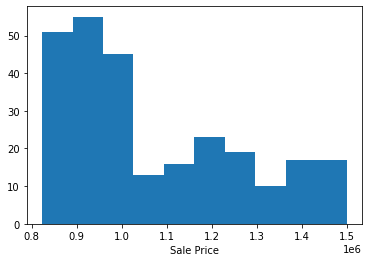

In [60]:
values = [800000, 900000, 1000000, 1100000, 1200000, 1300000, 1400000, 1500000]
plt.hist(houses['PRICE'], range = (houses['PRICE'].min(), 1500000))
plt.xlabel('Sale Price')
#plt.xticks(values)
plt.show()

In [29]:
# null values
houses.isna().sum()

PROPERTY TYPE          0
CITY                   0
STATE OR PROVINCE      0
ZIP OR POSTAL CODE     0
PRICE                  0
BEDS                   3
BATHS                  4
SQUARE FEET            0
LOT SIZE              72
YEAR BUILT            12
DAYS ON MARKET        12
$/SQUARE FEET          0
LATITUDE               0
LONGITUDE              0
dtype: int64

In [26]:
houses[houses['BATHS'].isna()] # bed/bath values may be imputed: KNNeighbor

,PROPERTY TYPE,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,LATITUDE,LONGITUDE
41,Multi-Family (2-4 Unit),Alexandria,VA,22314,1749999,NaN,NaN,1892.0,1408.0,1880.0,1.0,925.0,38.804275,-77.050697
42,Multi-Family (2-4 Unit),Alexandria,VA,22301,1749999,NaN,NaN,2618.0,7600.0,1925.0,112.0,668.0,38.820500,-77.056514
92,Multi-Family (2-4 Unit),Alexandria,VA,22314,1450000,NaN,NaN,3500.0,7306.0,1960.0,400.0,414.0,38.796159,-77.051167
199,Condo/Co-op,Alexandria,VA,22314,1000000,0.0,NaN,1000.0,NaN,NaN,6.0,1000.0,38.805759,-77.053725


In [36]:
houses[houses['LOT SIZE'].isna()] #Drop? or maybe fill in with something? KNN?

,PROPERTY TYPE,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,LATITUDE,LONGITUDE
3,Townhouse,Alexandria,VA,22314,3995000,3.0,4.0,4685.0,NaN,1993.0,67.0,853.0,38.800571,-77.040098
6,Condo/Co-op,Alexandria,VA,22314,3450000,3.0,2.5,3035.0,NaN,2014.0,66.0,1137.0,38.810828,-77.040705
16,Condo/Co-op,Alexandria,VA,22314,2560000,2.0,3.5,2469.0,NaN,2021.0,50.0,1037.0,38.817423,-77.040390
19,Single Family Residential,Alexandria,VA,22314,2495000,5.0,4.5,6000.0,NaN,2004.0,278.0,416.0,38.794692,-77.049360
22,Condo/Co-op,Alexandria,VA,22314,2234000,2.0,2.5,1960.0,NaN,2021.0,219.0,1140.0,38.817423,-77.040390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,Condo/Co-op,Alexandria,VA,22314,849900,2.0,2.0,1408.0,NaN,1986.0,48.0,604.0,38.822759,-77.042819
336,Townhouse,Alexandria,VA,22306,828990,5.0,4.5,2558.0,NaN,NaN,NaN,324.0,38.759468,-77.082101
344,Condo/Co-op,Alexandria,VA,22314,825000,3.0,3.5,1740.0,NaN,2001.0,65.0,474.0,38.802980,-77.067105
346,Condo/Co-op,Alexandria,VA,22314,825000,2.0,2.0,1298.0,NaN,1975.0,18.0,636.0,38.812431,-77.042459


In [37]:
houses[houses['YEAR BUILT'].isna()]

,PROPERTY TYPE,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,LATITUDE,LONGITUDE
33,Condo/Co-op,Alexandria,VA,22314,1912000,2.0,2.5,1863.0,NaN,NaN,NaN,1026.0,38.816544,-77.039684
84,Condo/Co-op,Alexandria,VA,22314,1495000,2.0,2.5,1481.0,NaN,NaN,NaN,1009.0,38.816544,-77.039684
129,Condo/Co-op,Alexandria,VA,22314,1288000,2.0,2.0,1655.0,NaN,NaN,NaN,778.0,38.816544,-77.039684
140,Condo/Co-op,Alexandria,VA,22314,1233000,2.0,2.0,1394.0,NaN,NaN,NaN,885.0,38.816544,-77.039684
157,Condo/Co-op,Alexandria,VA,22314,1186000,2.0,2.0,1448.0,NaN,NaN,NaN,819.0,38.816544,-77.039684
199,Condo/Co-op,Alexandria,VA,22314,1000000,0.0,NaN,1000.0,NaN,NaN,6.0,1000.0,38.805759,-77.053725
281,Single Family Residential,Alexandria,VA,22301,899500,5.0,4.5,3803.0,5304.0,NaN,74.0,237.0,38.814295,-77.064969
292,Condo/Co-op,Alexandria,VA,22314,898000,1.0,2.0,952.0,NaN,NaN,NaN,943.0,38.816544,-77.039684
300,Townhouse,Alexandria,VA,22312,884900,3.0,2.0,2763.0,NaN,NaN,NaN,320.0,38.805021,-77.143675
315,Townhouse,Alexandria,VA,22306,864925,4.0,4.0,2558.0,3000.0,NaN,30.0,338.0,38.759483,-77.082101


In [38]:
houses['PROPERTY TYPE'].value_counts() # --> one hot encode

Single Family Residential    189
Townhouse                     94
Condo/Co-op                   51
Multi-Family (2-4 Unit)        3
Name: PROPERTY TYPE, dtype: int64

# Machine Learning

In [76]:
import sklearn
from sklearn import linear_model

In [78]:
model = linear_model.Lasso(alpha=1.0)

In [98]:
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [99]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [103]:
X,y= houses[['BEDS','BATHS','SQUARE FEET', 'LOT SIZE','YEAR BUILT']], houses[['PRICE']]
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 767554.594 (335448.098)


In [101]:
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)

In [102]:
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [108]:
from pandas import read_csv
from sklearn.linear_model import Lasso
# load the dataset
# define model
model = Lasso(alpha=1.0)
# fit model
model.fit(X, y)
# define new data
row = [2,2,10000,2000,2000]
# make a prediction
yhat = model.predict([row])
# summarize prediction
print('Predicted: %.3f' % yhat)

Predicted: 5428019.283


In [110]:
row = [2,2,10000,2000,2020]
# make a prediction
yhat = model.predict([row])
print('Predicted: %.3f' % yhat)

Predicted: 5313691.721


# Visualizations